In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

In [4]:
# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# mean and std for each channel

In [5]:
# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform)

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,shuffle=False)

In [7]:
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print(classes)

('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [8]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [9]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

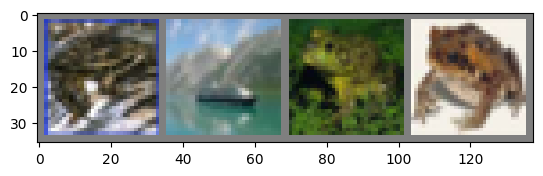

In [10]:
# show images
imshow(torchvision.utils.make_grid(images))

In [15]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [21]:
!pip install torchsummary

In [22]:
from torchvision import models
from torchsummary import summary
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [25]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')

Epoch [1/5], Step [2000/12500], Loss: 2.3131
Epoch [1/5], Step [4000/12500], Loss: 2.2543
Epoch [1/5], Step [6000/12500], Loss: 2.2851
Epoch [1/5], Step [8000/12500], Loss: 2.2099
Epoch [1/5], Step [10000/12500], Loss: 2.0520
Epoch [1/5], Step [12000/12500], Loss: 2.0981
Epoch [2/5], Step [2000/12500], Loss: 1.8785
Epoch [2/5], Step [4000/12500], Loss: 2.2308
Epoch [2/5], Step [6000/12500], Loss: 1.8260
Epoch [2/5], Step [8000/12500], Loss: 2.2764
Epoch [2/5], Step [10000/12500], Loss: 1.5595
Epoch [2/5], Step [12000/12500], Loss: 1.3019
Epoch [3/5], Step [2000/12500], Loss: 1.7158
Epoch [3/5], Step [4000/12500], Loss: 1.8762
Epoch [3/5], Step [6000/12500], Loss: 1.3925
Epoch [3/5], Step [8000/12500], Loss: 1.8349
Epoch [3/5], Step [10000/12500], Loss: 1.2058
Epoch [3/5], Step [12000/12500], Loss: 1.2299
Epoch [4/5], Step [2000/12500], Loss: 2.1915
Epoch [4/5], Step [4000/12500], Loss: 1.4332
Epoch [4/5], Step [6000/12500], Loss: 1.4592
Epoch [4/5], Step [8000/12500], Loss: 2.0780
Epoc

In [26]:
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

In [27]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 50.14 %
Accuracy of plane: 53.3 %
Accuracy of car: 59.4 %
Accuracy of bird: 37.3 %
Accuracy of cat: 18.1 %
Accuracy of deer: 42.1 %
Accuracy of dog: 52.5 %
Accuracy of frog: 70.2 %
Accuracy of horse: 47.8 %
Accuracy of ship: 66.7 %
Accuracy of truck: 54.0 %
